<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/local_outlier_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from keras.datasets import mnist
np.set_printoptions(precision = 4, suppress = True, edgeitems = 5, linewidth = 200)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
np.random.seed(42)

In [4]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples = 300, cluster_std = 2.0, random_state = 10)[0]
data[:5]

array([[  4.6462,   5.0325],
       [  1.8196,  -5.0336],
       [  0.8906,   3.4107],
       [  0.6117,   2.2607],
       [  6.0123, -10.5266]])

Wizualizacja danych

In [5]:
tmp = pd.DataFrame(data, columns = ['x1', 'x2'])
px.scatter(tmp, 'x1', 'x2', width = 1000, title = 'Local outlier factor', template = 'plotly_dark')

In [8]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp, 'x1', 'x2', width = 700, title = 'Outliers', nbinsx = 20, nbinsy = 20)
fig2 = px.scatter(tmp, 'x1', 'x2', width = 700, title = 'Outliers', opacity = 0.5)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_traces(marker = dict(size = 4, line = dict(width = 2, color = 'white')), selector = dict(mode = 'markers'))
fig.update_layout(template = 'plotly_dark', width = 1000)
fig.show()

/tmp/ipython-input-3277907137.py:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



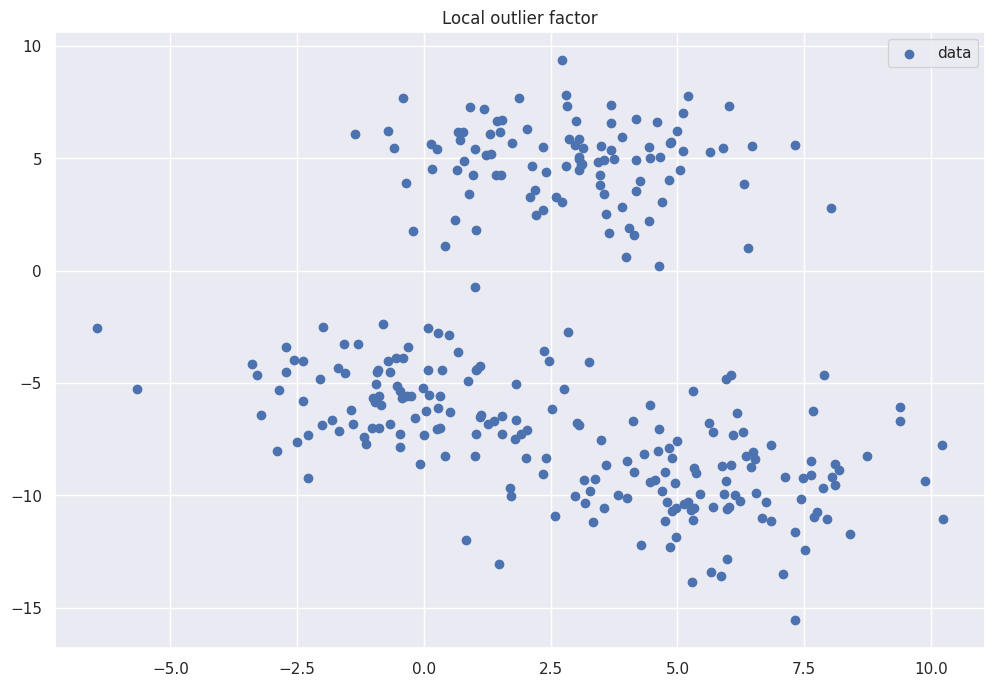

In [9]:
plt.figure(figsize = (12,8))
plt.scatter(data[:, 0], data[:,1], label = 'data', cmap = 'tab10')
plt.title('Local outlier factor')
plt.legend()
plt.show()

In [10]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors = 20)
y_pred = lof.fit_predict(data)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
all_data = np.c_[data, y_pred]
all_data[:5]

array([[  4.6462,   5.0325,   1.    ],
       [  1.8196,  -5.0336,   1.    ],
       [  0.8906,   3.4107,   1.    ],
       [  0.6117,   2.2607,   1.    ],
       [  6.0123, -10.5266,   1.    ]])

In [12]:
tmp['y_pred'] = y_pred
px.scatter(tmp, 'x1', 'x2',color = 'y_pred' ,width = 1000, title = 'Local outlier factor', template = 'plotly_dark')

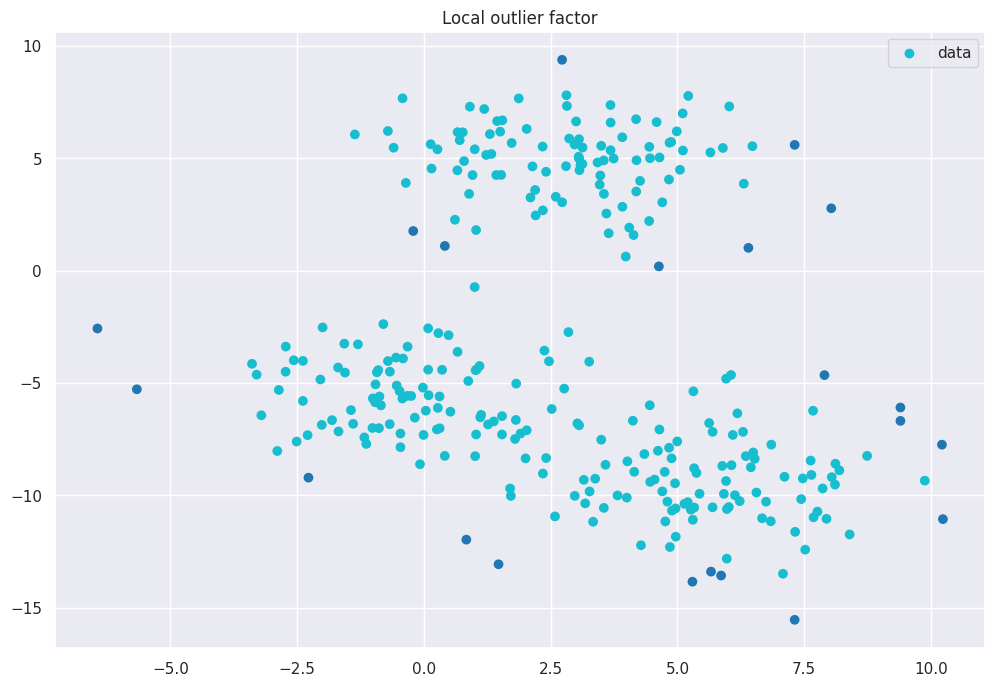

In [14]:
plt.figure(figsize = (12,8))
plt.scatter(all_data[:, 0], all_data[:,1], c = all_data[:,2], label = 'data', cmap = 'tab10')
plt.title('Local outlier factor')
plt.legend()
plt.show()

In [16]:
LOF_scores = lof.negative_outlier_factor_
radius = (LOF_scores.max() - LOF_scores) / (LOF_scores.max() - LOF_scores.min())
radius[:5]

array([0.0383, 0.1283, 0.1181, 0.2454, 0.0156])

/tmp/ipython-input-546909589.py:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



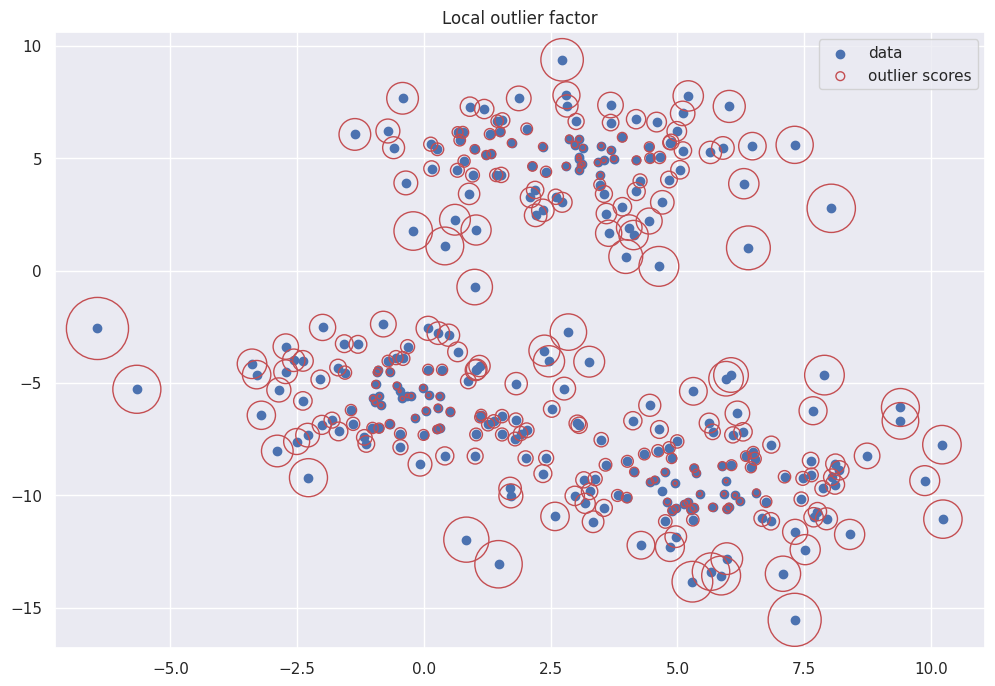

In [18]:
plt.figure(figsize = (12,8))
plt.scatter(all_data[:, 0], all_data[:,1], label = 'data', cmap = 'tab10')
plt.scatter(all_data[:, 0], all_data[:,1],s = 2000 * radius, edgecolors = 'r',facecolors = 'none',  label = 'outlier scores')
plt.title('Local outlier factor')
legend = plt.legend()
legend.legend_handles[1]._sizes = [40]
plt.show()

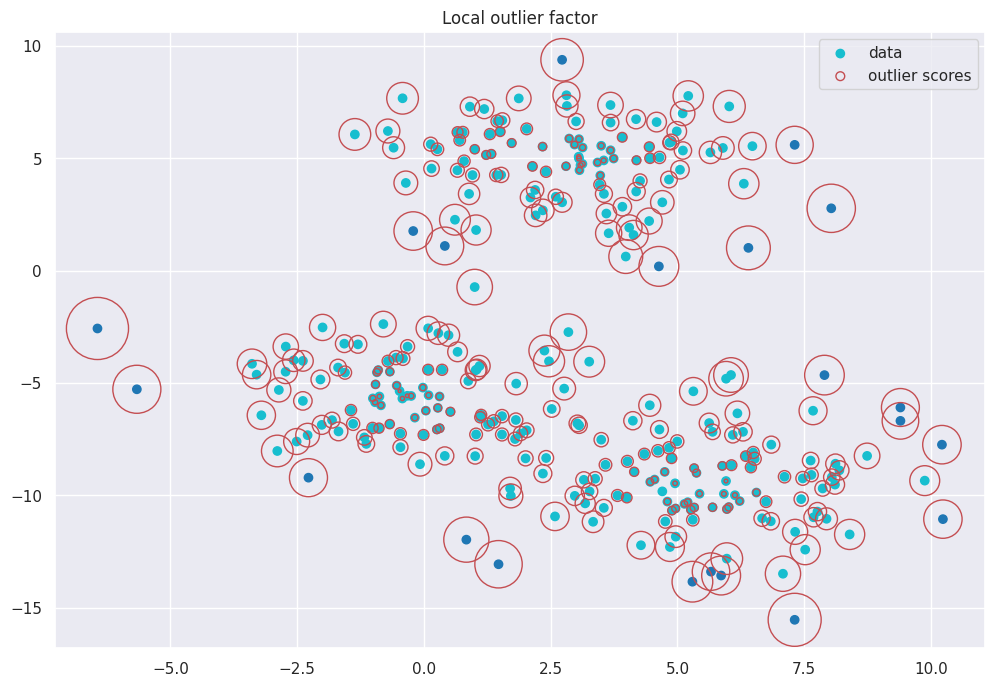

In [19]:
plt.figure(figsize = (12,8))
plt.scatter(all_data[:, 0], all_data[:,1], label = 'data', c = all_data[:,2],cmap = 'tab10')
plt.scatter(all_data[:, 0], all_data[:,1],s = 2000 * radius, edgecolors = 'r',facecolors = 'none',  label = 'outlier scores')
plt.title('Local outlier factor')
legend = plt.legend()
legend.legend_handles[1]._sizes = [40]
plt.show()